In [323]:
import numpy as np
from neurolab.net import newff
from neurolab.train import train_gd
from neurolab.trans import LogSig, PureLin
from neurolab.tool import minmax
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [82]:
def mas1():
    P=np.zeros((100,21))
    T=np.zeros((3,100))
    x=np.arange(0,1.05, 0.05)
    for i in range (0, 100):
        c=0.9*np.random.uniform(0,1)+0.1
        a=0.9*np.random.uniform(0,1)+0.1
        s=0.9*np.random.uniform(0,1)+0.1
        T[0,i]=c        
        T[1,i]=a
        T[2,i]=s
        P[i,:]=c*np.exp(-((x-a)**2/s))
    return (P, T.T)

In [84]:
P, T = mas1()

In [392]:
print(P.shape)
print(T.shape)

(100, 21)
(100, 3)


In [291]:
net=newff(minmax(P), [21,15,3], [LogSig(), LogSig(), PureLin()])

In [292]:
E = net.train(
    input = P,
    target = T,
    epochs = 1000,
    goal = 0.01
    )

Epoch: 100; Error: 0.21350806372081532;
Epoch: 200; Error: 0.04581807268875694;
Epoch: 300; Error: 0.021971579080134734;
Epoch: 400; Error: 0.013368893739099467;
The goal of learning is reached


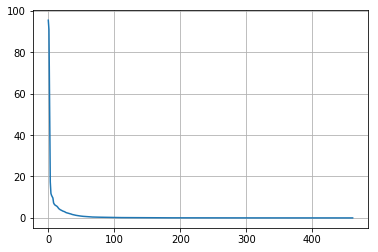

In [293]:
plt.plot(E)
plt.grid()

In [318]:
y = net.sim(P)

In [319]:
x=np.arange(0,1.05, 0.05)
p=0.2*np.exp(-((x-0.8)**2/0.7))
net.sim([p, p, p])

array([[0.20850921, 0.80234446, 0.72903541],
       [0.20850921, 0.80234446, 0.72903541],
       [0.20850921, 0.80234446, 0.72903541]])

In [326]:
def postreg(Ti, yi):

    X_train, X_test, y_train, y_test = train_test_split(yi.reshape(-1, 1), Ti.reshape(-1, 1), test_size = 1/3, random_state = 0)
    regressor = lm.LinearRegression()
    #Тренеруем модель на тренировочных данных. 
    regressor.fit(X_train,y_train)

    #Прогнозируем результаты тестовой выборки
    #Разница между y_pred и y_test в том, что y_pred это прогнозные значения
    #Теперь мы можем сравнить их с тестовыми значениями
    y_pred = regressor.predict(X_test)

    #Визуализация результатов тестового набор данных
    plt.scatter(X_train,y_train,color = 'red')
    plt.plot(X_train, regressor.predict(X_train), color = 'blue')

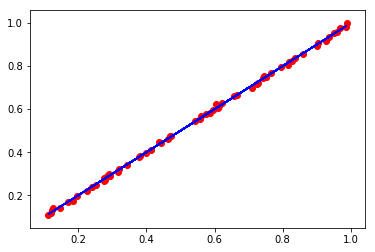

In [327]:
postreg(T[:,0], y[:,0])

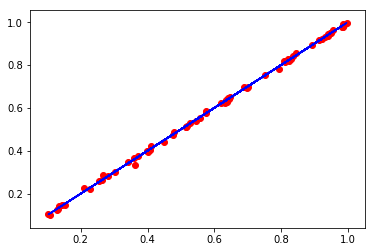

In [328]:
postreg(T[:,1], y[:,1])

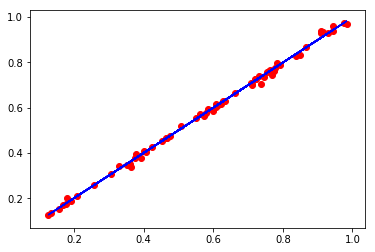

In [329]:
postreg(T[:,2], y[:,2])

In [129]:
P1 = P + np.random.uniform(0,0.01, P.shape)

In [262]:
net1 = newff(minmax(P1), [21,15,3], [LogSig(), LogSig(), PureLin()])

In [263]:
E1 = net1.train(
    input = P1,
    target = T,
    epochs = 1000,
    goal = 0.01
    )

Epoch: 100; Error: 0.1296846521574763;
Epoch: 200; Error: 0.0196894464155309;
The goal of learning is reached


In [335]:
y = net1.sim(P1)

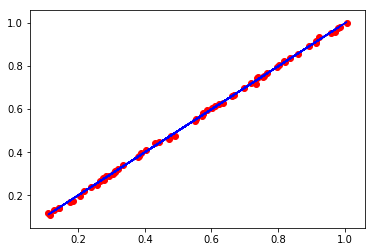

In [336]:
postreg(T[:,0], y[:,0])

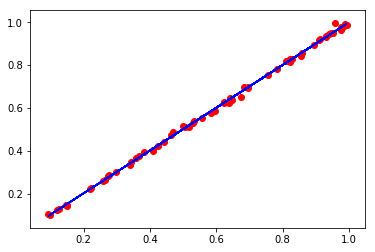

In [337]:
postreg(T[:,1], y[:,1])

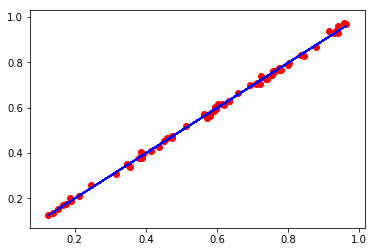

In [338]:
postreg(T[:,2], y[:,2])

In [155]:
P2 = P + np.random.uniform(0,0.05, P.shape)

In [266]:
net2 = newff(minmax(P2), [21,15,3], [LogSig(), LogSig(), PureLin()])

In [267]:
E2 = net2.train(
    input = P2,
    target = T,
    epochs = 1000,
    goal = 0.01
    )

Epoch: 100; Error: 0.13458563246140914;
Epoch: 200; Error: 0.02475615758386395;
The goal of learning is reached


In [347]:
y = net2.sim(P2)

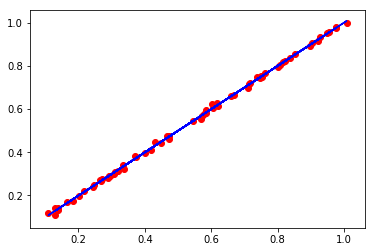

In [348]:
postreg(T[:,0], y[:,0])

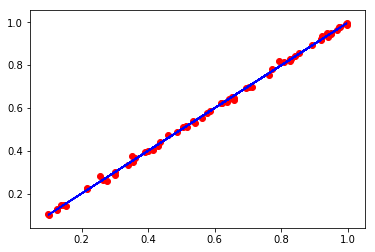

In [349]:
postreg(T[:,1], y[:,1])

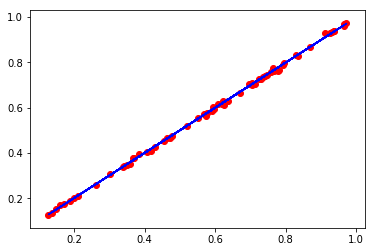

In [350]:
postreg(T[:,2], y[:,2])

In [160]:
P3 = P + np.random.uniform(0,0.1, P.shape)

In [284]:
net3 = newff(minmax(P3), [21,15,3], [LogSig(), LogSig(), PureLin()])

In [285]:
E3 = net3.train(
    input = P3,
    target = T,
    epochs = 1000,
    goal = 0.01
    )

Epoch: 100; Error: 0.16350925986091425;
Epoch: 200; Error: 0.023280132242192136;
The goal of learning is reached


In [343]:
y = net3.sim(P2)

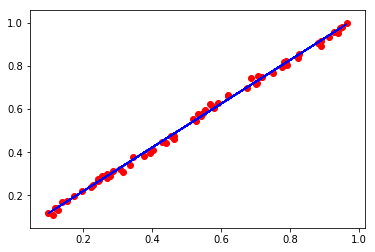

In [344]:
postreg(T[:,0], y[:,0])

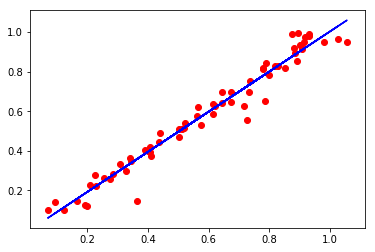

In [345]:
postreg(T[:,1], y[:,1])

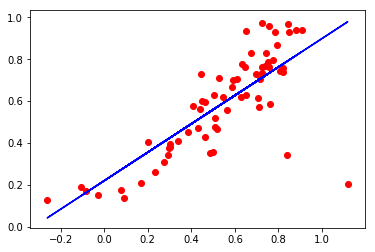

In [346]:
postreg(T[:,2], y[:,2])

In [170]:
P4 = P + np.random.uniform(0,-0.2, P.shape)

In [274]:
net4 = newff(minmax(P4), [21,15,3], [LogSig(), LogSig(), PureLin()])

In [275]:
E4 = net4.train(
    input = P4,
    target = T,
    epochs = 1000,
    goal = 0.01
    )

Epoch: 100; Error: 0.1306124890078892;
Epoch: 200; Error: 0.02057755264828195;
The goal of learning is reached


In [354]:
y = net4.sim(P4)

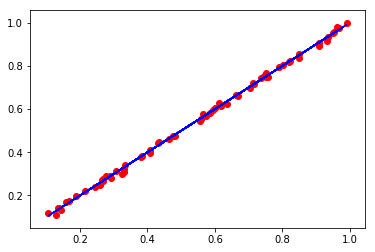

In [355]:
postreg(T[:,0], y[:,0])

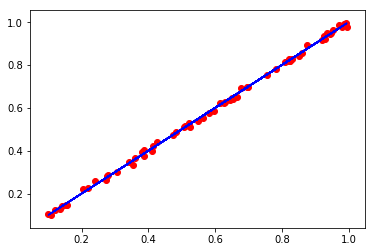

In [356]:
postreg(T[:,1], y[:,1])

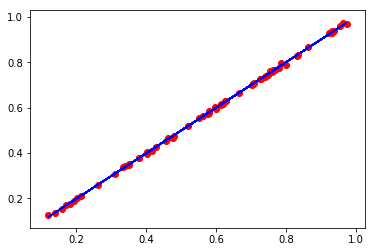

In [357]:
postreg(T[:,2], y[:,2])

In [377]:
def mas2():
    P=np.random.uniform(0,1,(100,21))
    T=np.random.uniform(0,1,(3,100))
    return (P, T.T)

In [378]:
PR, TR = mas2()

In [379]:
netr = newff(minmax(PR), [21,15,3], [LogSig(), LogSig(), PureLin()])

In [380]:
ER = netr.train(
    input = PR,
    target = TR,
    epochs = 1000,
    goal = 0.01
    )

Epoch: 100; Error: 0.1126946336112074;
The goal of learning is reached


In [387]:
y = netr.sim(np.random.uniform(0,1,(100,21)))

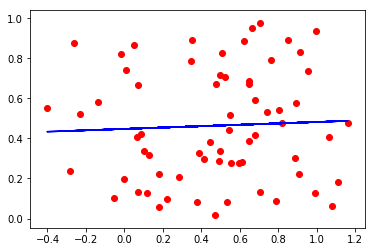

In [388]:
postreg(TR[:,0], y[:,0])

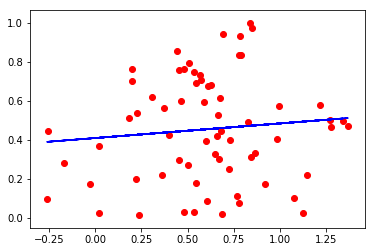

In [389]:
postreg(TR[:,1], y[:,1])

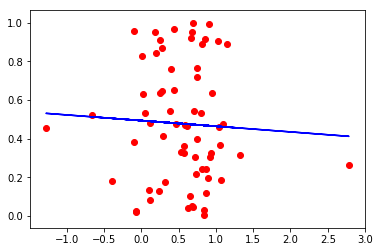

In [390]:
postreg(TR[:,2], y[:,2])